In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


# Data Collection

In [87]:
data=pd.read_csv(r'data/Iris.csv', index_col='Id')
data.columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth',
       'Species'] # renamed the columns
data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


# Data Pre-Processsing

In [88]:
#remove "Iris-"
data['Species']=data['Species'].apply(lambda s:s[5:])
data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [89]:
# checking for missing values and wrong data type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


# EDA

In [90]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [91]:
pd.pivot_table(data, values=['SepalLength','SepalWidth','PetalLength', 'PetalWidth'], index='Species') #by default it takes mean value

,PetalLength,PetalWidth,SepalLength,SepalWidth
Species,,,,
setosa,1.464,0.244,5.006,3.418
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


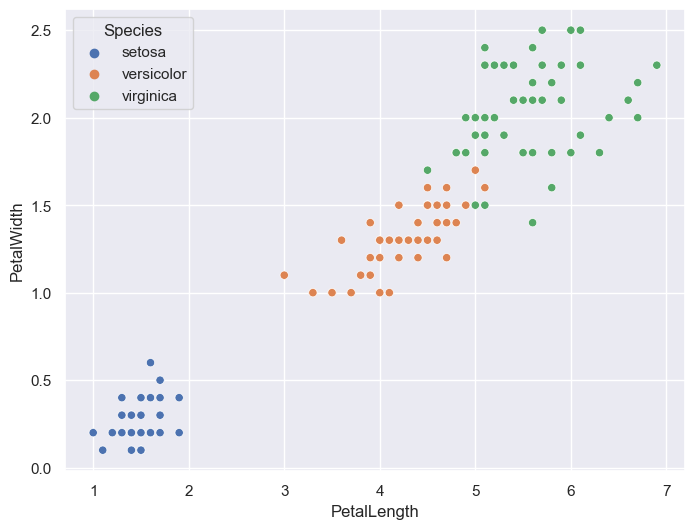

In [92]:
# Single plot
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='PetalLength', y='PetalWidth', hue='Species')
plt.show()

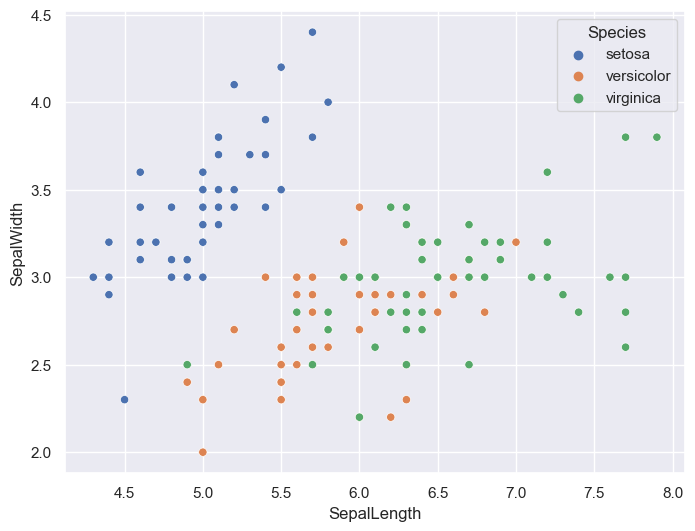

In [93]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='SepalLength', y='SepalWidth', hue='Species')
plt.show()

<Figure size 640x480 with 0 Axes>

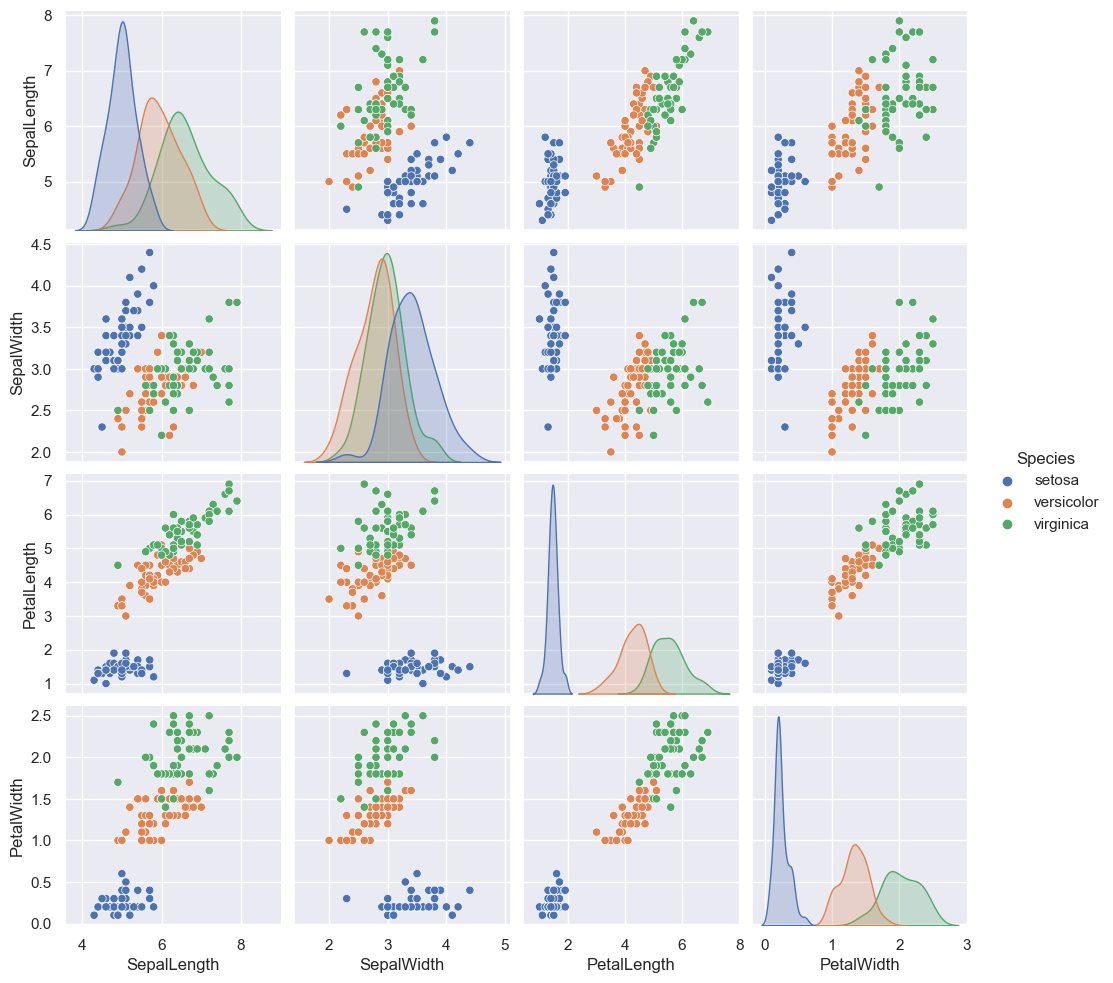

In [94]:
#pair plot
plt.figure()
sns.pairplot(data, hue='Species')
plt.show()

In [95]:
data.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


# Feature Engineering 
* Feature Transformation
* Feature Encoding
* Feature Scaling

In [96]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data.Species=encoder.fit_transform(data.Species)
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [97]:
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


# 

In [98]:
# Separating Features and target
features=data.drop(columns=['Species'])
target=data['Species']
#features, target
features.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features)
scaled_features.columns = features.columns
features = scaled_features
features

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [100]:
# Split data into train and test, here random_state value can be anything. instead of 42 we can use 45 also
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(
    features, target, test_size=0.2, random_state=42
)
#xtest

# Feature Selection

In [101]:
from sklearn.feature_selection import mutual_info_classif
selector=mutual_info_classif(xtrain, ytrain, random_state=42)
selector=pd.DataFrame(selector)
selector.columns=['Score']
selector.index= features.columns
selector=selector.sort_values('Score', ascending=False)
selector

,Score
PetalLength,0.982332
PetalWidth,0.963223
SepalLength,0.464479
SepalWidth,0.165316


<Axes: >

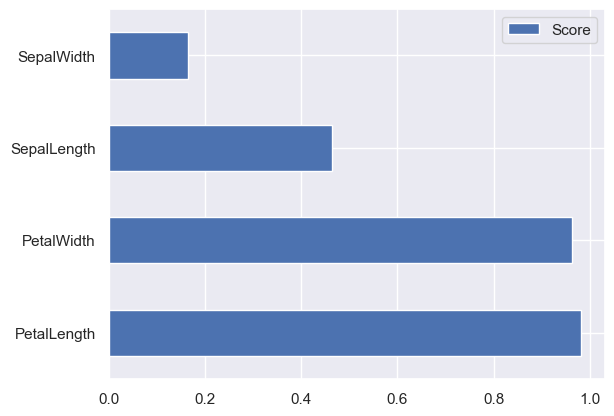

In [102]:
#selector.plot.bar()
selector.plot.barh()

In [103]:
# Selecting the best 2 features based on mutual_info classification
from sklearn.feature_selection import SelectKBest
extractor= SelectKBest(mutual_info_classif, k=2)
extractor.fit(xtrain, ytrain.values.ravel()) # .values.ravel converts 2d to 1D data
best_features= extractor.get_feature_names_out()
best_features

array(['PetalLength', 'PetalWidth'], dtype=object)

In [104]:
x = xtrain[best_features]
y = ytrain.values.ravel()

In [105]:
xt = xtest[best_features]
ytrue = ytest.values.ravel()

# Modeling


In [106]:
#Fitting into the model-Logistic Regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [107]:
ypred=model.predict(xt)
ypred==ytrue

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [108]:
encoder.inverse_transform(ypred)

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [109]:
# Test and Eavluate
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
confusion_matrix(ytrue, ypred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [110]:
# Accuracy score
accuracy_score(ytrue, ypred)

1.0

In [111]:
# f1_score(ytrue, ypred,) # by default it works with binary data
f1_score(ytrue, ypred, average='weighted') # average= weighted means there are more than 2 species/metrics

1.0

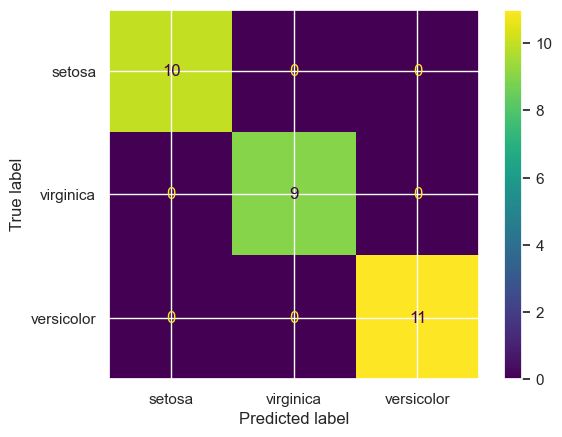

In [112]:
#Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(ytrue, ypred)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['setosa','virginica', 'versicolor'])
#cm
cm_display.plot()

# Test/Tune Model - Cross Validation

In [113]:
from sklearn.model_selection import  cross_val_score
cv=cross_val_score(model, features[best_features], target.values.ravel())
cv

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [114]:
cv.mean()

0.96

# Test/Tune Model - Parameter Tuning

In [115]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [116]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    model,
    param_grid={
       'C': [1,2,3,4,5,6,7,8,9],
       'penalty': ['l1','l2'],
       'solver': ['lbfgs', 'sag', 'liblinear','newton-cg' ],
       'max_iter': [5000,]
    }, scoring='accuracy'
)
grid.fit(xtrain[best_features], ytrain.values.ravel())

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_iter': [5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'liblinear', 'newton-cg']},
             scoring='accuracy')

In [117]:
grid.best_params_

{'C': 9, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}

In [118]:
best_model=grid.best_estimator_
best_model

LogisticRegression(C=9, max_iter=5000, solver='liblinear')

# Model Visualization

In [119]:
import warnings
warnings.filterwarnings(action='ignore')

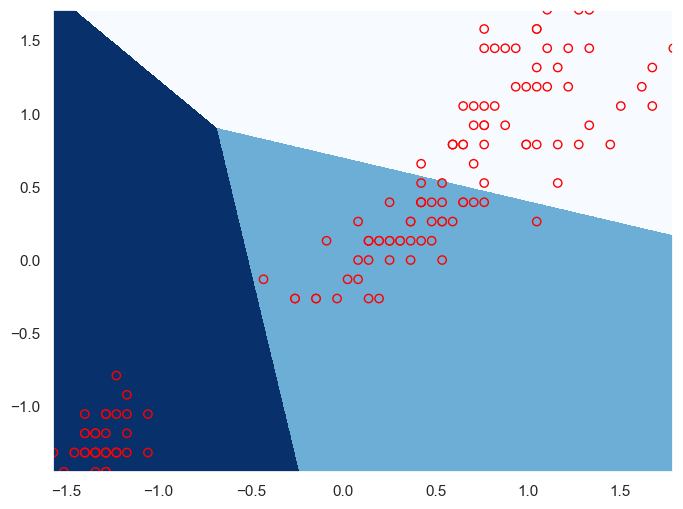

In [120]:
xmin, xmax = features.PetalLength.values.min(), features.PetalLength.values.max()
ymin, ymax = features.PetalWidth.values.min(), features.PetalWidth.values.max()

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.001), np.arange(ymin, ymax, 0.001)
)

grid = np.c_[xx.ravel(), yy.ravel()]
y_pred = best_model.predict(grid)
y_pred = y_pred.reshape(yy.shape)

predictions = best_model.predict(features[best_features])

plt.figure(1, figsize=(8, 6))
plt.set_cmap(plt.cm.Blues_r)
plt.pcolormesh(xx, yy, y_pred)
plt.scatter(features.PetalLength, features.PetalWidth, c=predictions, edgecolors='red')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# Pipelines

In [121]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(C=9, max_iter=5000,penalty='l2', solver='liblinear'))
    ]
)
pipeline.fit(xtrain[best_features], ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=9, max_iter=5000, solver='liblinear'))])

In [122]:
y_pred = pipeline.predict(xtest[best_features])
accuracy_score(y_pred, ytrue)

1.0

In [123]:
pipeline.fit(features[best_features], target)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=9, max_iter=5000, solver='liblinear'))])

# Saving Models

In [124]:
from joblib import dump
dump(pipeline, 'ClassifierPipeline')

['ClassifierPipeline']

# Loading Saved Models

In [125]:
from joblib import load
pipe = load('ClassifierPipeline')

In [126]:
pipe.predict(xtest[best_features])

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [127]:
# entering new data into the model via numpy array for prediction
pipe.predict(np.array([
    [0.2, 2],
    [0.3, 2.3]
]))

array([2, 2])